In [5]:
import tensorflow
(x_train,y_train),(x_test,y_test) = tensorflow.keras.datasets.mnist.load_data()

In [6]:
print(x_train.shape)

(60000, 28, 28)


In [7]:
x_train= x_train.reshape(x_train.shape[0],28*28).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],28*28).astype('float32')/255

y_train = tensorflow.keras.utils.to_categorical(y_train,10)
y_test = tensorflow.keras.utils.to_categorical(y_test,10)

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(48000, 784)
(48000, 10)
(10000, 784)
(10000, 10)


In [19]:
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

def createModel(op):
    model = tensorflow.keras.models.Sequential()
    model.add(layers.Input(shape=(28*28,)))
    model.add(layers.Dense(128,activation='relu',kernel_regularizer=l2(0.001)))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation='relu',kernel_regularizer=l2(0.0001)))
    model.add(layers.Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=op,metrics=['accuracy'])
    history=model.fit(x_train,y_train,validation_split=0.2,batch_size=64,epochs=25,callbacks=[tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)],verbose=0)
    return history


In [23]:
history1=createModel('adam')
history2=createModel('SGD')
history3=createModel('Adagrad')

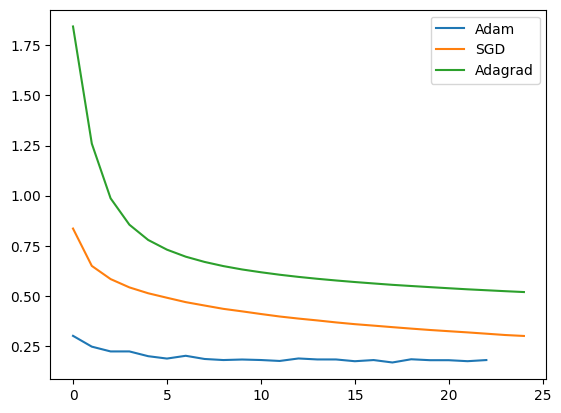

In [24]:
import matplotlib.pyplot as plt

plt.plot(history1.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['val_loss'])
plt.legend(['Adam','SGD','Adagrad'])

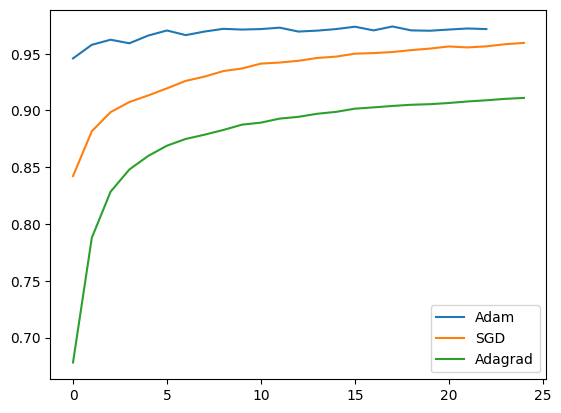

In [25]:
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.legend(['Adam','SGD','Adagrad'])